***

## Pandas第二课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：在本周课程结束前，提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
- 注意：该作业不计入分数，仅供巩固本堂课程知识点使用
***

- 同学姓名:<u>chenjiafeng</u>  
- 批改人：
- 情况总结:

***

## 作业
- 作业所需数据文件位于0.Teacher/data目录下
***


#### 1.读入NVDA.csv中的数据


In [9]:
import pandas as pd
import numpy as np
nvda=pd.read_csv('data/NVDA.csv', index_col=[0])
nvda.head(), nvda.shift(1).head()

(                Open      High       Low     Close  Adj Close    Volume
 Date                                                                   
 1999-01-22  1.750000  1.953125  1.552083  1.640625   1.523430  67867200
 1999-01-25  1.770833  1.833333  1.640625  1.812500   1.683028  12762000
 1999-01-26  1.833333  1.869792  1.645833  1.671875   1.552448   8580000
 1999-01-27  1.677083  1.718750  1.583333  1.666667   1.547611   6109200
 1999-01-28  1.666667  1.677083  1.651042  1.661458   1.542776   5688000,
                 Open      High       Low     Close  Adj Close      Volume
 Date                                                                     
 1999-01-22       NaN       NaN       NaN       NaN        NaN         NaN
 1999-01-25  1.750000  1.953125  1.552083  1.640625   1.523430  67867200.0
 1999-01-26  1.770833  1.833333  1.640625  1.812500   1.683028  12762000.0
 1999-01-27  1.833333  1.869792  1.645833  1.671875   1.552448   8580000.0
 1999-01-28  1.677083  1.718750  1.583

#### 2.请计算nvda股票Adj Close每天的log return

In [56]:
nvda['log return'] = np.log(nvda['Adj Close']/ nvda['Adj Close'].shift(1))
nvda['log return'].head(10)

Date
1999-01-22         NaN
1999-01-25    0.099630
1999-01-26   -0.080762
1999-01-27   -0.003121
1999-01-28   -0.003129
1999-01-29   -0.048164
1999-02-01    0.019545
1999-02-02   -0.080581
1999-02-03    0.020762
1999-02-04    0.053346
Name: log return, dtype: float64

#### 3.请找出nvda股票涨幅最大的10天

In [22]:
nvda['grouth'] = nvda['Adj Close']/ nvda['Adj Close'].shift(1)-1
nvda.sort_values(by=['grouth'], ascending=False).index[0:10]

Index(['2000-03-07', '2003-05-09', '2001-01-03', '2016-11-11', '2000-03-13',
       '2000-12-22', '2000-12-08', '2000-04-05', '2003-02-14', '1999-08-19'],
      dtype='object', name='Date')

#### 4. 将这十天的股票信息都输出来

In [19]:
nvda.sort_values(by=['grouth'], ascending=False)[:10]

,Open,High,Low,Close,Adj Close,Volume,log return,grouth
Date,,,,,,,,
2000-03-07,6.250000,7.270833,5.979167,6.942708,6.446771,48805200,0.353572,0.424145
2003-05-09,6.276667,7.176667,6.100000,7.123333,6.614493,230771400,0.285656,0.330635
2001-01-03,4.833333,6.572917,4.708333,6.520833,6.055031,22759200,0.267650,0.306890
2016-11-11,79.510002,88.769997,78.500000,87.970001,87.635475,54335100,0.260876,0.298067
2000-03-13,8.916667,12.500000,8.833333,12.437500,11.549053,60379200,0.234938,0.264830
2000-12-22,5.020833,6.375000,5.020833,5.843750,5.426314,23727000,0.229402,0.257847
2000-12-08,7.447917,8.333333,6.752600,8.291667,7.699371,21334800,0.205709,0.228395
2000-04-05,6.312500,8.125000,5.989583,7.640625,7.094833,15990000,0.200898,0.222500
2003-02-14,3.740000,4.016667,3.650000,4.013333,3.726649,88721100,0.198735,0.219858


#### 5把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

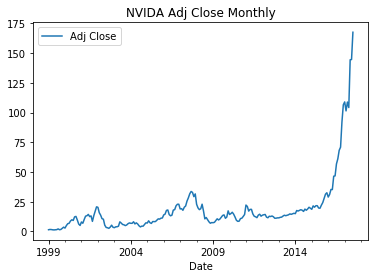

In [57]:
nvda.index = pd.to_datetime(nvda.index)
monthly_last = nvda.resample('M').last()
%matplotlib inline
monthly_last['Adj Close'].plot(legend=True, title='NVIDA Adj Close Monthly')

#### 6.使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

In [42]:
apple = pd.read_csv('data/AAPL.csv', index_col=0, parse_dates=[0])
google = pd.read_csv('data/GOOG.csv', index_col=0, parse_dates=[0])
gspc=pd.read_csv('data/GSPC.csv', index_col=0, parse_dates=[0])

apple_adj = apple['Adj Close']
google_adj = google['Adj Close']
gspc_adj = gspc['Adj Close']
nvda_adj=nvda['Adj Close']
concat_data = pd.concat([nvda_adj, apple_adj, google_adj, gspc_adj], keys=['nvda', 'apple', 'google', 'gspc'])
concat_data['apple'].head(10)

Date
1980-12-12    0.423252
1980-12-15    0.401170
1980-12-16    0.371726
1980-12-17    0.380927
1980-12-18    0.391969
1980-12-19    0.415892
1980-12-22    0.436134
1980-12-23    0.454536
1980-12-24    0.478460
1980-12-26    0.522625
Name: Adj Close, dtype: float64

#### 7.从Google有数据的那一天起开始画出四只股票的Adj Close折线图


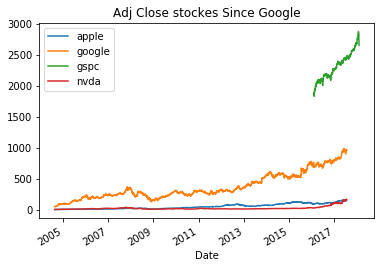

In [55]:
data=dict(zip(['nvda', 'apple', 'google', 'gspc'],[nvda_adj, apple_adj, google_adj, gspc_adj]))

stocks = pd.DataFrame(data)
#stock.plot()
valid_stocks = stocks[stocks.index >= stocks["google"].first_valid_index()]
valid_stocks.plot(title='Adj Close stockes Since Google')